In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

Intercalibrazione

In [95]:
import pandas as pd
data=pd.read_excel("InterCalibrazione-2.xlsx", sheet_name='batch2' )
display(data)

channels = [0, 1,2, 3, 4, 5, 6, 7, 8, 9,10, 11, 12,14, 15]
channel_idx = [0,  1, 2, 3, 4, 5, 6, 7,  8, 9,  10, 11, 12, -1, 13,14]

ch=np.zeros((12,5))
ch_err=np.zeros((12,5))



,ch,val_1,err_stat_1,val_2,err_stat_2,val_3,err_stat_3,val_4,err_stat_4,val_5,err_stat_5,media,std,drift relativo,Drift relativo [%],Range,val_6,err_stat_6
0,0.0,-630.4,1.3,-630.7,1.10,-629.0,1.30,-632.22,0.90,-632.50,1.10,-630.964,0.167332,0.000265,0.026520,L,-632.70,1.12
1,1.0,-590.4,1.1,-590.0,1.20,-586.0,1.30,-589.20,1.30,-589.10,1.00,-588.940,0.130384,0.000221,0.022139,NaN,-591.12,1.31
2,2.0,-2290.9,1.6,-2298.0,1.20,-2298.0,1.20,-2299.40,1.50,-2293.60,1.40,-2295.980,0.178885,0.000078,0.007791,L,-2295.01,1.47
3,3.0,-1413.0,2.0,-1409.1,1.50,-1405.0,1.80,-1414.00,1.70,-1413.80,1.50,-1410.980,0.212132,0.000150,0.015034,H,-1412.10,1.68
4,4.0,-950.5,1.1,-946.6,1.30,-947.0,1.10,-951.00,1.20,-949.60,1.00,-948.940,0.114018,0.000120,0.012015,H,-952.76,2.00
5,5.0,-1576.9,2.5,-1584.6,2.00,-1585.0,2.30,-1582.70,2.20,-1583.20,2.40,-1582.480,0.192354,0.000122,0.012155,H,-1582.80,2.90
6,6.0,-1064.1,1.5,-1063.7,1.40,-1062.7,1.60,-1068.10,1.60,-1058.10,1.50,-1063.340,0.083666,0.000079,0.007868,L,-1063.49,1.89
7,7.0,-1576.6,1.9,-1581.1,2.10,-1580.0,2.00,-1578.70,1.80,-1573.70,1.70,-1578.020,0.158114,0.000100,0.010020,H,-1582.58,1.60
8,8.0,-1226.7,2.9,-1229.0,3.00,-1239.3,3.00,-1234.50,3.50,-1235.50,2.30,-1233.000,0.427785,0.000347,0.034695,H,-1234.51,2.21
9,9.0,-671.3,1.0,-670.9,1.00,-672.1,1.10,-672.90,1.00,-668.02,0.84,-671.044,0.093381,0.000139,0.013916,NaN,-672.83,0.82


In [96]:
means=data["media"]   
n_channels=15
peak_centers=np.zeros(n_channels)
peak_err_drift=np.zeros(n_channels)
for i in channels:
    peak_centers[channel_idx[i]]=data["media"][i]
    peak_err_drift[channel_idx[i]]=data["std"][i]
    

print(peak_centers)
print(peak_err_drift)

[ -630.964  -588.94  -2295.98  -1410.98   -948.94  -1582.48  -1063.34
 -1578.02  -1233.     -671.044  -550.6    -859.34   -828.92  -1436.06
 -2005.24 ]
[0.16733201 0.13038405 0.17888544 0.21213203 0.11401754 0.19235384
 0.083666   0.15811388 0.42778499 0.09338094 0.03507136 0.17888544
 0.10954451 0.19235384 0.48785244]


In [97]:
channel_ref=5
ref=peak_centers[channel_idx[channel_ref]]
print(ref)

-1582.48


In [98]:
coeff_cal=peak_centers/peak_centers[channel_idx[channel_ref]]
print("coefficienti di intercalibrazione\n", coeff_cal)
list=[0,1,2,3,4,5,6,7,8,9,10,11,12,14,15]

coefficienti di intercalibrazione
 [0.39871847 0.37216268 1.45087458 0.8916258  0.59965371 1.
 0.6719453  0.99718164 0.77915677 0.4240458  0.34793489 0.54303372
 0.52381073 0.90747434 1.2671503 ]


##  Test

[ -632.7   -591.12 -2295.01 -1412.1   -952.76 -1582.8  -1063.49 -1582.58
 -1234.51  -672.83  -551.96  -857.91  -824.32 -1435.02 -2004.21]
[1.12 1.31 1.47 1.68 2.   2.9  1.89 1.6  2.21 0.82 0.78 1.44 1.28 1.89
 2.45]


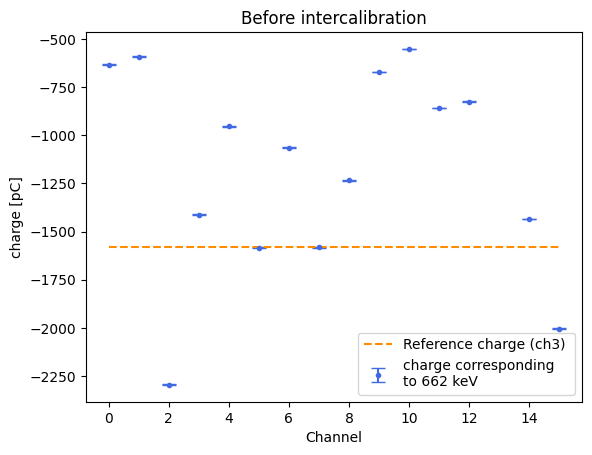

In [99]:
peak_centers_test=np.zeros(n_channels)
peak_err_test=np.zeros(n_channels)
for i in channels:
    peak_centers_test[channel_idx[i]]=data["val_6"][i]    #posizioni dei picchi dei dati di test
    peak_err_test[channel_idx[i]]=data["err_stat_6"][i]      #errori stocastici sulla posizione dei picchi

print(peak_centers_test)
print(peak_err_test)


plt.errorbar(list, peak_centers_test, yerr=peak_err_test, ls='', capsize=5, marker='.', color='royalblue', label='charge corresponding\nto 662 keV')
plt.title("Before intercalibration")
plt.plot(list, 0*np.array(list) + ref, color='darkorange', ls='--', label='Reference charge (ch3) '.format(channel_ref))
plt.xlabel('Channel')
plt.ylabel("charge [pC]")
plt.legend(loc='lower right')

In [100]:
test_peak_centers=np.array([peak_centers_test[channel_idx[i]]/coeff_cal[channel_idx[i]] for i in list])
print(test_peak_centers)
test_peak_errors=np.array([peak_err_test[channel_idx[i]]/coeff_cal[channel_idx[i]] for i in list])
print(test_peak_errors)
print(test_peak_centers)

[-1586.83394932 -1588.33765341 -1581.81143773 -1583.73613233
 -1588.85034333 -1582.8        -1582.70323246 -1587.05288805
 -1584.41799254 -1586.69180918 -1586.38877733 -1579.84664603
 -1573.698202   -1581.33396209 -1581.66715246]
[2.80899956 3.51996604 1.013182   1.8841985  3.33525829 2.9
 2.81272895 1.60452212 2.83639968 1.93375338 2.24179876 2.65176903
 2.44363075 2.08270351 1.9334723 ]
[-1586.83394932 -1588.33765341 -1581.81143773 -1583.73613233
 -1588.85034333 -1582.8        -1582.70323246 -1587.05288805
 -1584.41799254 -1586.69180918 -1586.38877733 -1579.84664603
 -1573.698202   -1581.33396209 -1581.66715246]


[-1.55       -1.66412214  0.65986395 -0.66666667 -1.91       -0.11034483
 -0.07936508 -2.85       -0.68325792 -2.17804878 -1.74358974  0.99305556
  3.59375     0.55026455  0.42040816]
[-0.00177019 -0.00221613 -0.00064052 -0.00118972 -0.00209916 -0.0018322
 -0.00177717 -0.00101101 -0.00179018 -0.00121873 -0.00141315 -0.0016785
 -0.0015528  -0.00131705 -0.00122243]
[663.82139076 664.45043638 661.72031986 662.52547875 664.66491032
 662.13386583 662.09338499 663.91297956 662.81072182 663.76192917
 663.63516164 660.89838713 658.32630411 661.52057713 661.6599609 ]


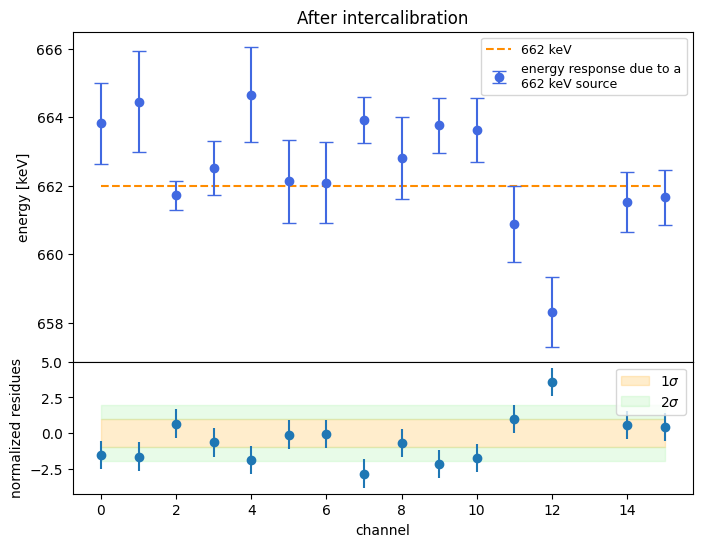

In [101]:


###########################################################################
#test_peak_centers=np.array([peak_centers[channel_idx[i]]/coeff_cal[channel_idx[i]] for i in list])
#print(test_peak_centers)


#print(test_peak_errors)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True, gridspec_kw={'height_ratios': [5, 2]})

print( (test_peak_centers-ref)/test_peak_errors  )
ax1.plot(list, 0*np.array(list) + 662, color='darkorange', ls='--', label='662 keV '.format(channel_ref))
ax1.errorbar(list, test_peak_centers*662/ref, yerr=test_peak_errors*662/np.abs(ref), ls='', capsize=5, marker='o', color='royalblue', label='energy response due to a\n662 keV source')
ax1.legend(fontsize=9)
ax1.set_title("After intercalibration")
ax1.set_ylabel("energy [keV]")

xlim = ax1.get_xlim()
ax2.errorbar(list,(np.array(test_peak_centers)-ref)/np.array(test_peak_errors), yerr=1, ls=' ', marker='o')
ax2.fill_between([0,15], [-1, -1], [1, 1], color = "orange", alpha = 0.2, label = r'$1\sigma$')
ax2.fill_between([0,15], [-2, -2], [-1, -1], color = "lightgreen", alpha = 0.2, label = r'$2\sigma$')
ax2.fill_between([0,15], [2, 2], [1, 1], color = "lightgreen", alpha = 0.2)
ax2.set_xlabel("channel")
ax2.set_ylabel("normalized residues")
ax2.legend()
plt.subplots_adjust(hspace=0)

print(test_peak_errors/test_peak_centers)
print(test_peak_centers*662/ref)

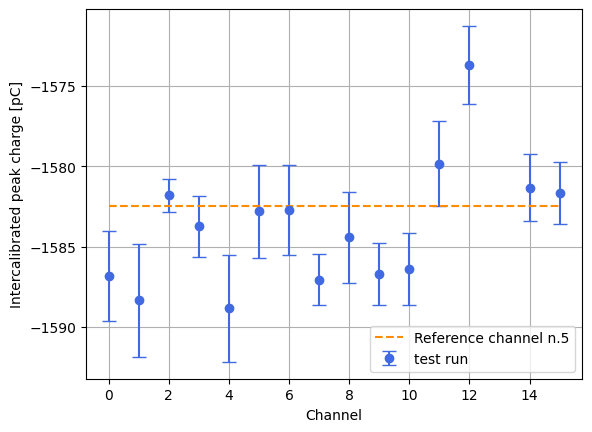

In [102]:
#plot
#plt.errorbar(list, train_peak_centers, yerr=train_peak_errors, ls='', capsize=5,  marker='o', color='darkorange', label= 'calibration run')
plt.errorbar(list, test_peak_centers, yerr=test_peak_errors, ls='', capsize=5, marker='o', color='royalblue', label='test run')
plt.plot(list, 0*np.array(list) + ref, color='darkorange', ls='--', label='Reference channel n.{}'.format(channel_ref))
#plt.plot(list, (test_peak_centers-ref)/test_peak_errors, ls='', marker='o', color='red')
#plt.ylim(peak_centers[channel_ref]-50, peak_centers[channel_ref]+50)
#plt.ylim(-990, -930)
plt.grid()
plt.xlabel('Channel')
plt.ylabel('Intercalibrated peak charge [pC]')
plt.legend(loc= 'lower right')


#plot in kev
    

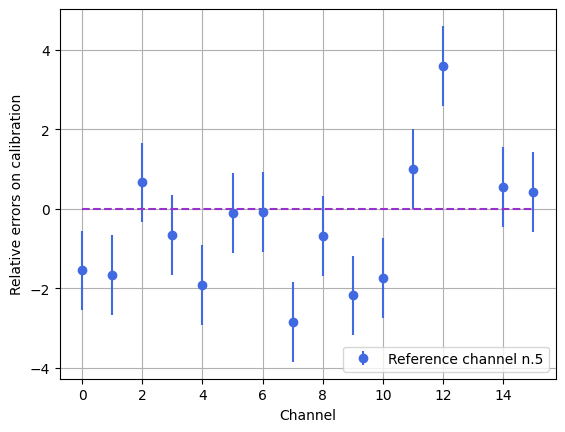

In [103]:
plt.errorbar(list, (test_peak_centers-ref)/test_peak_errors, yerr=1, ls='', marker='o', color='royalblue', label='Reference channel n.{}'.format(channel_ref))
plt.plot(list, 0*np.array(list), color='darkorchid', ls='--')
plt.grid()
plt.xlabel('Channel')
plt.ylabel('Relative errors on calibration')
plt.legend(loc= 'lower right')



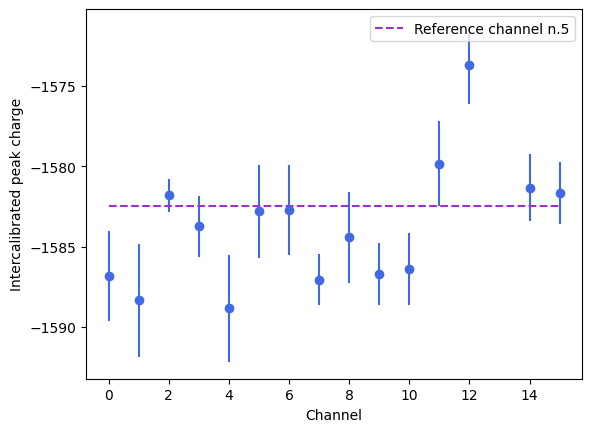

In [104]:
#plot con train e test insieme
#plot
plt.errorbar(list, test_peak_centers, yerr=test_peak_errors, ls='', marker='o', color='royalblue')
plt.plot(list, 0*np.array(list) + peak_centers[channel_ref], color='darkorchid', ls='--', label='Reference channel n.{}'.format(channel_ref))
plt.xlabel('Channel')
plt.ylabel('Intercalibrated peak charge')
plt.legend()
    

In [105]:
#0, 3, 5, 7, 10, 15
nice_channels=[0, 2,3,4, 5,6, 7, 8,10, 11,14,15]

# Picchi all together train

# Picchi all together test

In [ ]:

import uproot
FILE_PATH="../Dati/Run_Cs_batches_bis_Measurements_Only_5_29_2024_0003.root"
file = uproot.open(FILE_PATH)
file["tree"].show()

charges = np.array(file["tree"]["charge"].array()[1:-1])
channels= np.array(file["tree"]["ch"].array()[1:-1])
print(charges.shape)

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
ev                   | int32_t                  | AsDtype('>i4')
nch                  | int32_t                  | AsDtype('>i4')
ch                   | int32_t[]                | AsJagged(AsDtype('>i4'))
base                 | float[]                  | AsJagged(AsDtype('>f4'))
amp                  | float[]                  | AsJagged(AsDtype('>f4'))
charge               | float[]                  | AsJagged(AsDtype('>f4'))
letime               | float[]                  | AsJagged(AsDtype('>f4'))
tetime               | float[]                  | AsJagged(AsDtype('>f4'))
(499998, 15)


(15, 150)


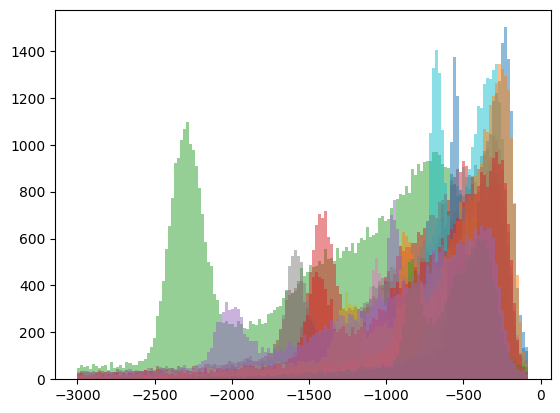

In [138]:
Nbin=150
N_ch=15
channel=0

edge_N_all=np.zeros((15, 150))
bin_N_all=np.zeros((15,150))

for channel in list:
    #_, edges, _ = plt.hist(charges[:,channel_idx[channel]], bins = Nbin, color = "r")
    binCs, edgesCs, _ = plt.hist(charges[:,channel_idx[channel]], bins = Nbin, range=(-3000,-80), alpha = 0.5)
    bin_N_all[channel_idx[channel]]=binCs
    edge_N_all[channel_idx[channel]]=edgesCs[:-1]
print(edge_N_all.shape)

[ -632.7   -591.12 -2295.01 -1412.1   -952.76 -1582.8  -1063.49 -1582.58
 -1234.51  -672.83  -551.96  -857.91  -824.32      nan -1435.02 -2004.21
      nan      nan      nan      nan      nan      nan      nan      nan
      nan      nan      nan      nan      nan      nan      nan      nan
      nan      nan      nan]
36
[  50.   60.   51.   56.   44.   67.   55.   49.   58.   60.   41.   73.
   48.   51.   62.   50.   75.   69.   59.   59.   76.   78.   87.  111.
  139.  176.  268.  333.  419.  556.  653.  773.  924.  944. 1020. 1069.
 1097. 1005.  978.  910.  816.  706.  585.  502.  485.  364.  338.  278.
  238.  250.  236.  237.  225.  250.  235.  219.  213.  248.  235.  231.
  255.  237.  242.  277.  284.  296.  310.  314.  347.  379.  358.  367.
  378.  408.  475.  441.  456.  487.  478.  481.  504.  492.  555.  515.
  518.  506.  561.  517.  545.  564.  546.  580.  540.  583.  603.  595.
  650.  607.  616.  623.  686.  697.  674.  684.  731.  679.  769.  792.
  784.  824.  796. 

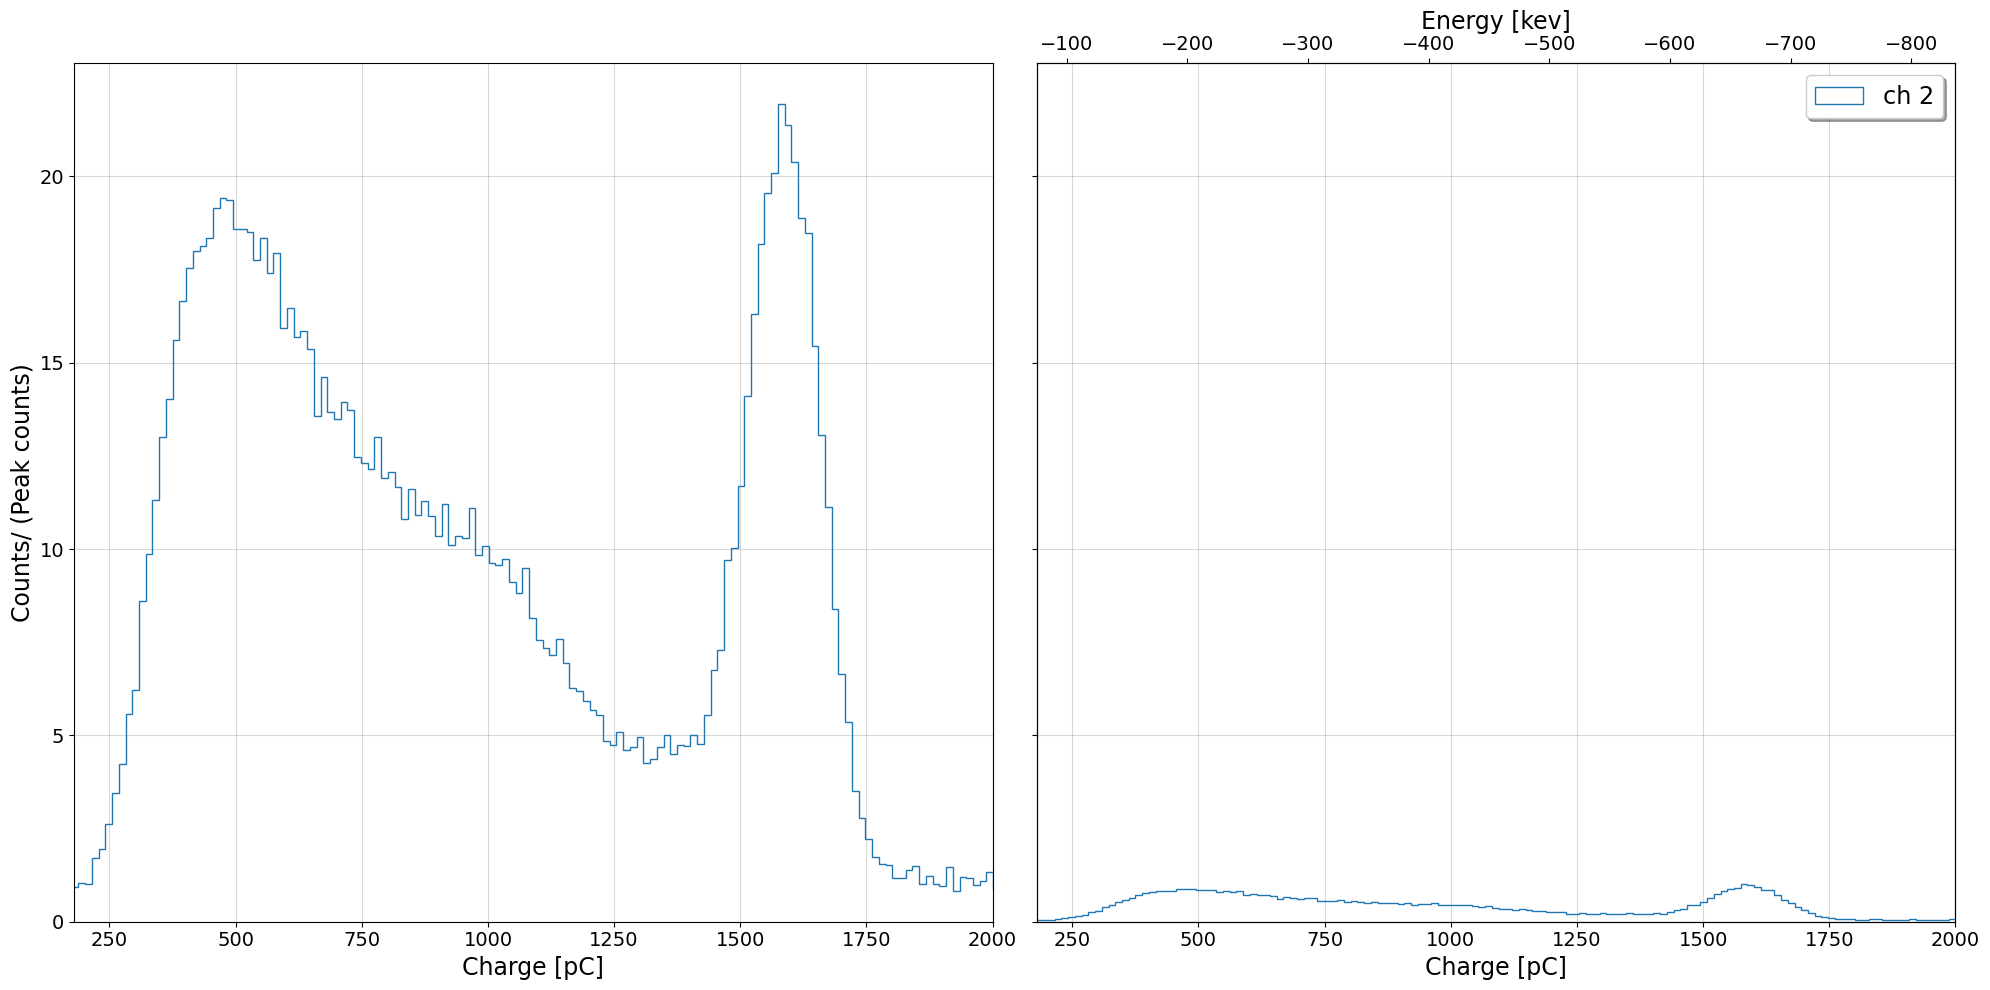

In [140]:

# Creazione del subplot con due grafici con asse y condiviso
fig, (ax3, ax1) = plt.subplots(1, 2, sharey=True, figsize=(20, 10))

# Posizioni dei picchi
peakpos = np.array(data["val_6"])
print(peakpos)

# Spessore delle linee dei grafici
lw = 1

# Canali interessanti
nice_channels = [2]

# Fattore di rebinning
rebinning = 4

# Funzione per processare il canale
def process_channel(ax, ch):

    edge_N = edge_N_all[channel_idx[ch]]
    bin_N = bin_N_all[channel_idx[ch]]

    # Rebinning
    #edge_N, bin_N = rebin_(edge_N, bin_N, rebinning)

    # Convolution
    #centers_N = np.convolve(edge_N, [0.5,0.5], mode='valid')
    centers_N=edge_N

    # Filtraggio basato sui limiti solo per ax3
    if ax == ax3:
        indices = (centers_N > lim_N[0]) & (centers_N < lim_N[1])
        edge_N = edge_N[:len(centers_N)][indices]
        bin_N = bin_N[:len(centers_N)][indices] 
    # Indice del picco più vicino
    peak_index = np.argmin(np.abs(peakpos[ch] - edge_N))
    print(peak_index)

    print(bin_N_all[channel_idx[ch]])
    # Normalizzazione
    if ax == ax1:
        edge_N /= coeff_cal[channel_idx[ch]]
    print(bin_N[peak_index])
    bin_N /= bin_N[peak_index]
    print(bin_N_all[channel_idx[ch]])

    label = 'ch {}'.format(ch)
    if ch == channel_ref:
        label = 'Ref ch {}'.format(channel_ref)
        ax.hist(-edge_N, bins=len(bin_N), weights=bin_N, linewidth=lw, color='coral', alpha=0.5, label=label)
        ax.hist(-edge_N, bins=len(bin_N), weights=bin_N, linewidth=lw, histtype='step', fill=False, edgecolor='coral')
    else:
        # Plot per gli altri assi
        ax.hist(-edge_N, bins=len(bin_N), weights=bin_N, linewidth=lw, histtype='step', fill=False, label=label)

# Processa i canali interessanti per il grafico 1
for ch in nice_channels:
    process_channel(ax1, ch)

# Aggiunge la legenda per ax1
ax1.legend(ncol=1, fancybox=True, shadow=True, fontsize="xx-large")

# Limiti sull'asse x per ax1
low, high = 180, 2000
ax1.set_xlim(low, high)

# Etichetta sull'asse x per ax1
ax1.set_xlabel("Charge [pC]", fontsize=17)

# Aggiunge l'asse x gemello
ax2 = ax1.twiny()
ax2.set_xlabel('Energy [kev]', fontsize=17)

#Proporzione secondo asse
ax2.set_xlim(low * 662. / ref, high * 662. / ref)

# Processa i canali interessanti per il grafico 2
for ch in nice_channels:
    process_channel(ax3, channel_idx[ch])

# Limiti dell'asse x, le label e le dimensioni dei caratteri per ax3
ax3.set_xlim(low, high)
ax3.set_xlabel("Charge [pC]", fontsize=17)
ax3.set_ylabel("Counts/ (Peak counts)", fontsize=17)
ax3.set_axisbelow(True)

# Griglia per entrambi gli assi
ax1.grid(color='gray', alpha=0.3)
ax3.grid(color='gray', alpha=0.3)

# Dimensioni dei caratteri per gli assi
ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax3.tick_params(axis='both', which='major', labelsize=14)

# Layout stretto
plt.tight_layout()

# Salva il grafico
plt.savefig("intercalibrazione.png")



In [ ]:
#edge_N_all, bin_N_all = load_histo(PATH_HR)

#edge_N = edge_N_all[channel_idx[channel]]
#bin_N = bin_N_all[channel_idx[channel]]

edge_N = edge_N_all
bin_N = bin_N_all



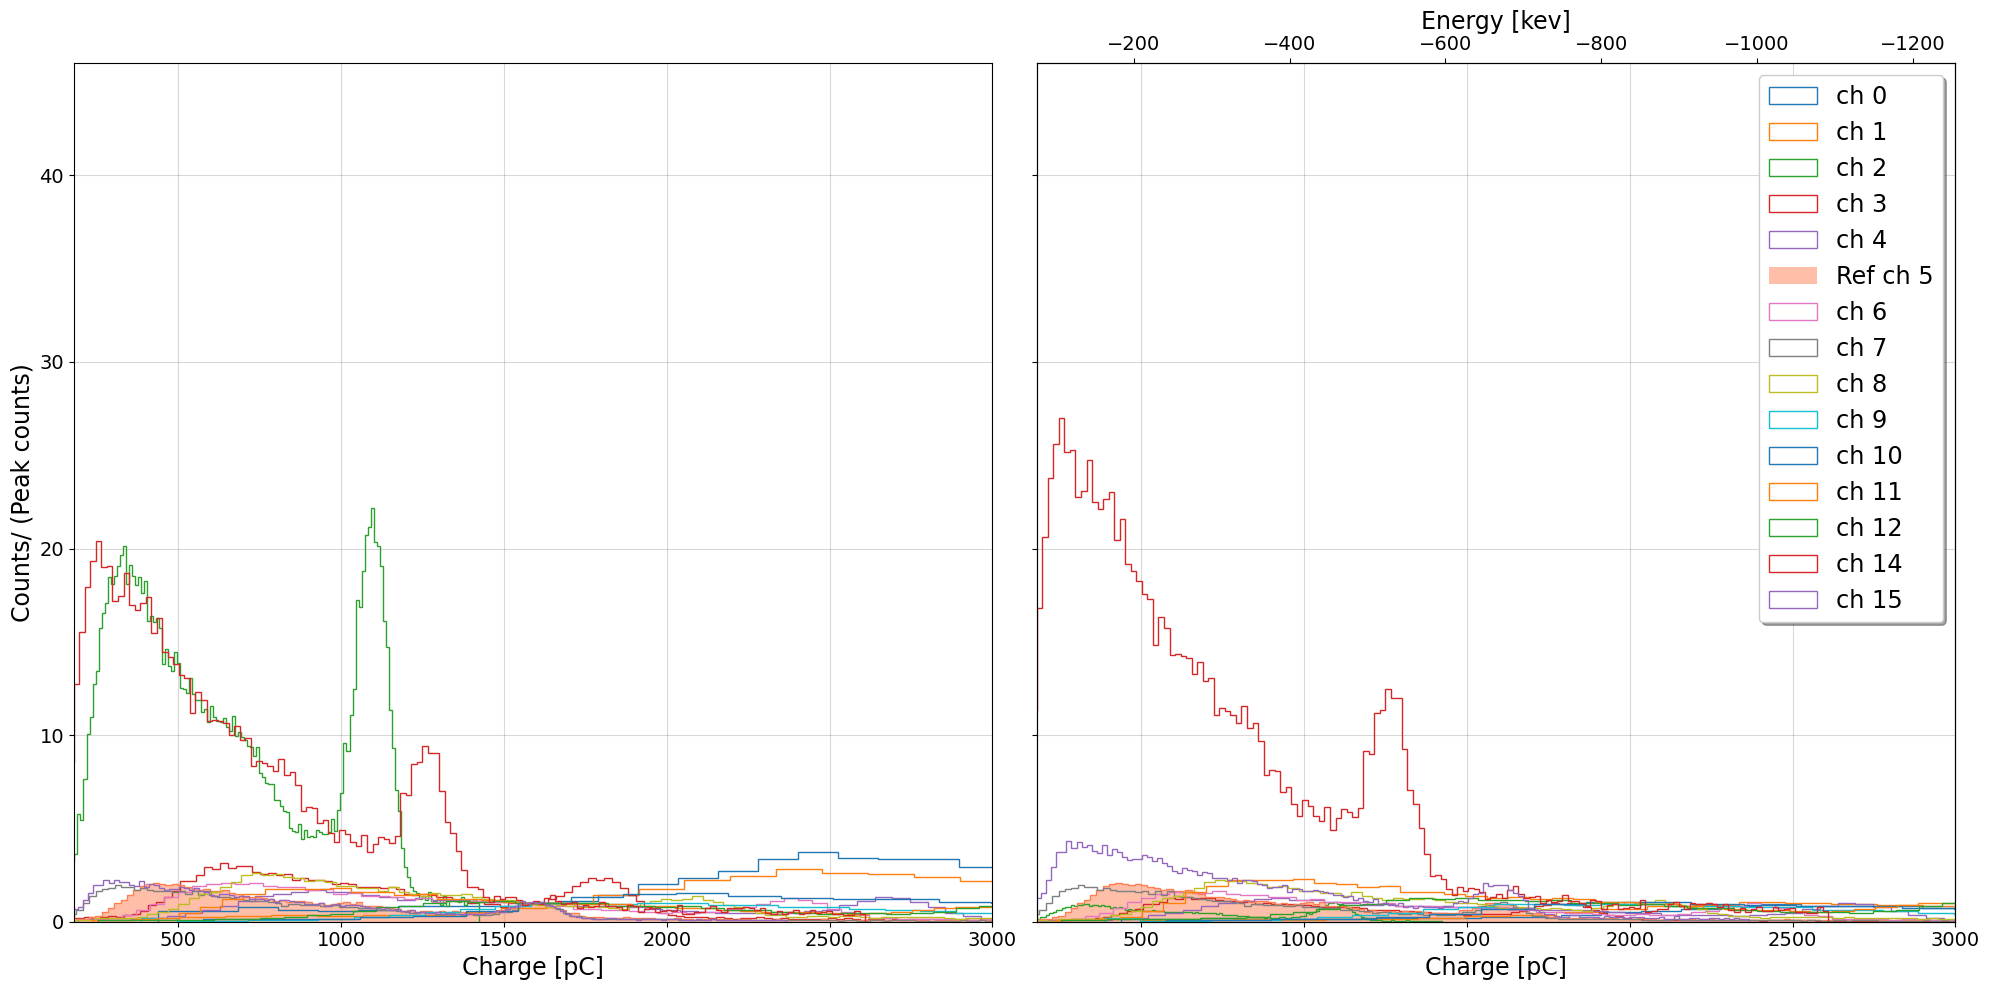

In [ ]:

# Creazione del subplot con due grafici con asse y condiviso
fig, (ax3, ax1) = plt.subplots(1, 2, sharey=True, figsize=(20, 10))

# Posizioni dei picchi
peakpos = np.array(test_peak_centers)

# Spessore delle linee dei grafici
lw = 1

# Canali interessanti
nice_channels = [0, 1, 2, 3, 4, 5,6, 7, 8, 9,10, 11, 12, 14, 15]




# Funzione per processare il canale
def process_channel(ax, ch):


    edge_N = edge_N_all[channel_idx[ch]]
    bin_N = bin_N_all[channel_idx[ch]]

    # Indice del picco più vicino
    peak_index = np.argmin(np.abs(peakpos[channel_idx[ch]] - edge_N))

    # Normalizzazione
    if ax == ax1:
        edge_N /= coeff_cal[channel_idx[ch]]
    bin_N /= bin_N[peak_index]

    label = 'ch {}'.format(ch)
    if ch == channel_ref:
        label = 'Ref ch {}'.format(channel_ref)
        ax.hist(-edge_N, bins=len(bin_N), weights=bin_N, linewidth=lw, color='coral', alpha=0.5, label=label)
        ax.hist(-edge_N, bins=len(bin_N), weights=bin_N, linewidth=lw, histtype='step', fill=False, edgecolor='coral')
    else:
        # Plot per gli altri assi
        ax.hist(-edge_N, bins=len(bin_N), weights=bin_N, linewidth=lw, histtype='step', fill=False, label=label)

# Processa i canali interessanti per il grafico 1
for ch in nice_channels:
    process_channel(ax1, ch)

# Aggiunge la legenda per ax1
ax1.legend(ncol=1, fancybox=True, shadow=True, fontsize="xx-large")

# Limiti sull'asse x per ax1
low, high = 180, 3000
ax1.set_xlim(low, high)

# Etichetta sull'asse x per ax1
ax1.set_xlabel("Charge [pC]", fontsize=17)

# Aggiunge l'asse x gemello
ax2 = ax1.twiny()
ax2.set_xlabel('Energy [kev]', fontsize=17)

#Proporzione secondo asse
ax2.set_xlim(low * 662. / ref, high * 662. / ref)

# Processa i canali interessanti per il grafico 2
for ch in nice_channels:
    process_channel(ax3, ch)

# Limiti dell'asse x, le label e le dimensioni dei caratteri per ax3
ax3.set_xlim(low, high)
ax3.set_xlabel("Charge [pC]", fontsize=17)
ax3.set_ylabel("Counts/ (Peak counts)", fontsize=17)
ax3.set_axisbelow(True)

# Griglia per entrambi gli assi
ax1.grid(color='gray', alpha=0.3)
ax3.grid(color='gray', alpha=0.3)

# Dimensioni dei caratteri per gli assi
ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax3.tick_params(axis='both', which='major', labelsize=14)

# Layout stretto
plt.tight_layout()

# Salva il grafico
plt.savefig("intercalibrazione.png")

